## Load Modules

In [94]:
using MLJ
using MultivariateStats
using Plots; gr()
using StatsPlots
using DataFrames
using PyCall

using CSV: read
using StatsBase: countmap, kurtosis
using Clustering: randindex, silhouettes, varinfo, vmeasure, mutualinfo
using LinearAlgebra: diag

In [2]:
ENV["LINES"] = 100;

In [3]:
RNG = 133;

## Import Data and Set Up

In [4]:
data = read("biodegradation.csv")
describe(data)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,1,4.78264,2.0,4.828,6.496,,,Float64
2,2,3.06951,0.8039,3.0463,9.1775,,,Float64
3,3,0.716588,0,0.0,12,,,Int64
4,4,0.042654,0,0.0,3,,,Int64
5,5,0.980095,0,0.0,36,,,Int64
6,6,0.290047,0,0.0,13,,,Int64
7,7,1.64645,0,1.0,18,,,Int64
8,8,37.0556,0.0,37.5,60.7,,,Float64
9,9,1.3763,0,1.0,24,,,Int64


In [5]:
label_counts = countmap(data[:(Class)])
collect(label_counts[i] / size(data)[1] for i in keys(label_counts))

2-element Array{Float64,1}:
 0.33744075829383885
 0.6625592417061611

In [6]:
coerce!(data, :Class=>Multiclass)
schema(data)

┌─────────┬─────────────────────────────────┬───────────────┐
│ _.names │ _.types                         │ _.scitypes    │
├─────────┼─────────────────────────────────┼───────────────┤
│ 1       │ Float64                         │ Continuous    │
│ 2       │ Float64                         │ Continuous    │
│ 3       │ Int64                           │ Count         │
│ 4       │ Int64                           │ Count         │
│ 5       │ Int64                           │ Count         │
│ 6       │ Int64                           │ Count         │
│ 7       │ Int64                           │ Count         │
│ 8       │ Float64                         │ Continuous    │
│ 9       │ Int64                           │ Count         │
│ 10      │ Int64                           │ Count         │
│ 11      │ Int64                           │ Count         │
│ 12      │ Float64                         │ Continuous    │
│ 13      │ Float64                         │ Continuous    │
│ 14    

In [7]:
y, X = unpack(data, ==(:Class), colname->true)
train, test = partition(eachindex(y), 0.7, shuffle=true, rng=RNG, stratify=values(data[:Class])) # gives 70:30 split

([814, 165, 622, 67, 804, 252, 769, 264, 70, 796  …  688, 257, 358, 278, 946, 284, 815, 56, 259, 17], [22, 598, 701, 445, 36, 20, 146, 811, 710, 923  …  932, 570, 176, 561, 1031, 816, 371, 970, 989, 109])

#### Confirming that data was stratified correctly

In [8]:
train_counts = countmap(data[train,:Class])
collect(train_counts[i] / size(train)[1] for i in keys(train_counts))

2-element Array{Float64,1}:
 0.33739837398373984
 0.6626016260162602

In [9]:
test_counts = countmap(data[test,:Class])
collect(test_counts[i] / size(test)[1] for i in keys(test_counts))

2-element Array{Float64,1}:
 0.33753943217665616
 0.6624605678233438

#### Standardizing data pre-clustering
* https://datascience.stackexchange.com/questions/6715/is-it-necessary-to-standardize-your-data-before-clustering

In [10]:
standardizer = Standardizer(count=true)
stand = machine(standardizer, X) #only want to standardize on training distribution
MLJ.fit!(stand, rows=train)
X_stand = MLJ.transform(stand, X);

┌ Info: Training Machine{Standardizer} @153.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319


In [11]:
train_data = convert(Matrix,X_stand[train,:])

738×41 Array{Float64,2}:
  0.228487    -1.57344     -0.483706  …  -0.0304587   -0.16698  -0.315475
 -0.143536     0.0083341   -0.483706     -0.387351    -0.16698  -0.315475
  1.33127      2.78452      0.979306      4.92863     -0.16698  -0.315475
  0.105112     0.332672    -0.483706     -0.24996     -0.16698  -0.315475
 -1.53293     -1.26366     -0.483706     -0.974312    -0.16698  -0.315475
 -0.551623    -0.209535    -0.483706  …  -0.576772    -0.16698  -0.315475
  0.558752     1.47519     -0.483706     -0.605226    -0.16698  -0.315475
  0.0652522   -0.72709     -0.483706     -0.170289    -0.16698  -0.315475
  0.505606     0.0181945   -0.483706      0.123192     5.70118  -0.315475
 -0.502273    -0.394535    -0.483706     -0.278413    -0.16698  -0.315475
  0.0329849    0.137224     1.71081   …   0.36383     -0.16698   1.01493
 -0.876194     0.446889    -0.483706     -0.737739    -0.16698  -0.315475
 -3.43101     -1.3517      -0.483706     -2.20108     -0.16698  -0.315475
 -0.466209    

## Set up model

In [12]:
task(model) = !model.is_supervised
models(task)

32-element Array{NamedTuple{(:name, :package_name, :is_supervised, :docstring, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :is_pure_julia, :is_wrapper, :load_path, :package_license, :package_url, :package_uuid, :prediction_type, :supports_online, :supports_weights, :input_scitype, :target_scitype, :output_scitype),T} where T<:Tuple,1}:
 (name = AffinityPropagation, package_name = ScikitLearn, ... )
 (name = AgglomerativeClustering, package_name = ScikitLearn, ... )
 (name = Birch, package_name = ScikitLearn, ... )
 (name = ContinuousEncoder, package_name = MLJModels, ... )
 (name = DBSCAN, package_name = ScikitLearn, ... )
 (name = FactorAnalysis, package_name = MultivariateStats, ... )
 (name = FeatureAgglomeration, package_name = ScikitLearn, ... )
 (name = FeatureSelector, package_name = MLJModels, ... )
 (name = FillImputer, package_name = MLJModels, ... )
 (name = ICA, package_name = MultivariateStats, ... )
 (name = KMeans, package_name 

# Clustering Algorithms
Run the clustering algorithms on the datasets and describe what you see.

### KMeans
* https://github.com/PyDataBlog/ParallelKMeans.jl/blob/master/src/hamerly.jl#L65
* https://juliastats.org/Clustering.jl/stable/validate.html

In [13]:
@load KMeans pkg=ParallelKMeans
# @load KMeans pkg=Clustering

KMeans(
    algo = ParallelKMeans.Hamerly(),
    k_init = "k-means++",
    k = 3,
    tol = 1.0e-6,
    max_iters = 300,
    copy = true,
    threads = 4,
    rng = Random._GLOBAL_RNG(),
    weights = nothing,
    init = nothing) @491

In [14]:
# https://stackoverflow.com/questions/51181392/julia-vs-matlab-distance-matrix-run-time-test
function dist_mat(X::Matrix)
    G = X * X'
    dG = diag(G)
    return sqrt.(dG .+ dG' .- 2 .* G)
end

dist_mat (generic function with 1 method)

In [15]:
upper = 8
k_range = 2:upper
total_costs = []
sils = []
ls = []
sil_means = []
assignments = []

for i in k_range
    println("K = $i")
    model = ParallelKMeans.KMeans(k=i, rng=RNG)
    mach = machine(model, X_stand)
    MLJ.fit!(mach, rows=train)
    
#     @show report(mach) 
#     @show fitted_params(mach)
    @show mach.report.totalcost # https://github.com/PyDataBlog/ParallelKMeans.jl/blob/87ce07d10796078aacffcbea0b2e9dc0c02f25d7/src/hamerly.jl#L65
    d = countmap(mach.report.assignments)
    
    k = d |> keys
    v = d |> values
    l = sort(collect(zip(k,v)), by=x->x[1])
    @show l
    
    # https://juliastats.org/Clustering.jl/stable/validate.html
    s = silhouettes(mach.report.assignments, dist_mat(train_data))
    println("silhouette: $(mean(s))")
    
    push!(assignments, mach.report.assignments)
    push!(ls, l)
    push!(total_costs, mach.report.totalcost) 
    push!(sils, s)
    push!(sil_means, mean(s))
    println("")
end

K = 2


┌ Info: Training Machine{KMeans} @638.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319


Iteration 1: Jclust = 56302.57851561873
Iteration 2: Jclust = 28188.785953114722
Iteration 3: Jclust = 29099.152762146925
Iteration 4: Jclust = 28462.951072449534
Iteration 5: Jclust = 28691.015987457038
Iteration 6: Jclust = 28568.87843605133
Iteration 7: Jclust = 28516.31895023834
Iteration 8: Jclust = 28479.442451417053
Iteration 9: Jclust = 28452.87835225411
Iteration 10: Jclust = 28551.664319077598
Iteration 11: Jclust = 28439.550561300628
Iteration 12: Jclust = 28246.821567534724
Iteration 13: Jclust = 28314.838545552535
Iteration 14: Jclust = 28475.655252076154
Iteration 15: Jclust = 28475.655252076154
Successfully terminated with convergence.
mach.report.totalcost = 27035.69291215478
l = [(1, 249), (2, 489)]
silhouette: 0.2053891773097492

K = 3
Iteration 1: Jclust = 52166.70586725931
Iteration 2: Jclust = 26653.305975588133
Iteration 3: Jclust = 27316.62701226548
Iteration 4: Jclust = 26387.32164921845
Iteration 5: Jclust = 26277.0749417549
Iteration 6: Jclust = 26564.68250054

┌ Info: Training Machine{KMeans} @045.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319
┌ Info: Training Machine{KMeans} @202.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319
┌ Info: Training Machine{KMeans} @050.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319
┌ Info: Training Machine{KMeans} @598.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319
┌ Info: Training Machine{KMeans} @768.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319


Iteration 3: Jclust = 20873.30119698174
Iteration 4: Jclust = 21474.422583036932
Iteration 5: Jclust = 21129.903345531922
Iteration 6: Jclust = 20966.6311250953
Iteration 7: Jclust = 20446.21267864471
Iteration 8: Jclust = 20412.80220039621
Iteration 9: Jclust = 20215.654992042848
Iteration 10: Jclust = 20468.610257119806
Iteration 11: Jclust = 20577.211960860128
Iteration 12: Jclust = 20519.24109352442
Iteration 13: Jclust = 20020.1593092931
Iteration 14: Jclust = 20200.773751263358
Iteration 15: Jclust = 20100.60189013033
Iteration 16: Jclust = 19426.543142621922
Iteration 17: Jclust = 19595.803515930467
Iteration 18: Jclust = 19934.44312505283
Iteration 19: Jclust = 20067.22050991859
Iteration 20: Jclust = 20112.19772554636
Iteration 21: Jclust = 20384.900818265356
Iteration 22: Jclust = 20558.036831425692
Iteration 23: Jclust = 20504.872472553267
Iteration 24: Jclust = 20540.17587200457
Iteration 25: Jclust = 20540.17587200457
Successfully terminated with convergence.
mach.report.t

┌ Info: Training Machine{KMeans} @019.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319


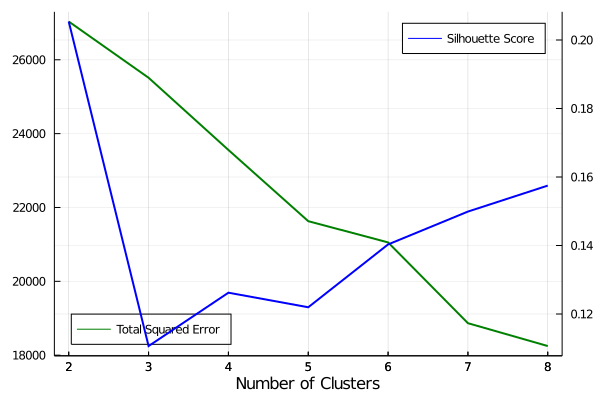

In [16]:
plot(k_range, total_costs, legend=:bottomleft, label="Total Squared Error", color=:green, lw=2)
xlabel!("Number of Clusters")
plot!(twinx(), k_range, sil_means, legend=:topright, label="Silhouette Score", color=:blue, lw=2)

In [17]:
savefig("figures/bio_kmeans_metrics_$upper")

In [18]:
function prepare_portfolio(ls)
    N = size(ls)[1]
    D = size(ls[end])[1]
    mat = zeros(N, D)
    for i in 1:N
#         print("\n")
#         @show i
        for j in 1:size(ls[i])[1]
#             @show j
            mat[i,j] = ls[i][j][2]
        end
    end
    return mat
end

prepare_portfolio (generic function with 1 method)

In [19]:
function cum_columns(mat; normalize=false)
    mat2 = deepcopy(mat)
    normalize && (mat2 ./= sum(mat2, dims = 2)) # if you want to normalize each row
    for i in 2:size(mat2)[2]
       mat2[:,i] = mat2[:,i-1] + mat2[:,i]
    end
    return mat2'
end

cum_columns (generic function with 1 method)

In [20]:
function cum_plot(mat)
    N = size(mat)[2]
    p = plot(legend=:outertopright, palette=palette(:Accent_8))
    for i in N+1:-1:1
        plot!(1:N, mat[i,:], label="Cluster $(i)", fill=0, α=1)
    end
    xticks!(collect(1:N),string.(collect(2:N+1)))
    ylabel!("Cluster Proportion")
    xlabel!("Number of Clusters")
    display(p)
end

cum_plot (generic function with 1 method)

In [21]:
# plotattr(:Series)
plotattr("fillrange")

fillrange {Number or AbstractVector}
fill_between, fillbetween, fillranges, fillrng, fillto, frange

Fills area between fillrange and y for line-types, sets the base for bar/stick types, and similar for other types.
Series attribute,  default: nothing


In [22]:
mat = prepare_portfolio(ls)
plotmat = cum_columns(mat, normalize=true)

8×7 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 0.337398  0.224932  0.210027  0.135501  0.166667  0.173442  0.173442
 1.0       0.762873  0.750678  0.589431  0.634146  0.246612  0.246612
 1.0       1.0       0.949864  0.672087  0.704607  0.261518  0.261518
 1.0       1.0       1.0       0.722222  0.754743  0.311653  0.287263
 1.0       1.0       1.0       1.0       0.97832   0.542005  0.517615
 1.0       1.0       1.0       1.0       1.0       0.563686  0.539295
 1.0       1.0       1.0       1.0       1.0       1.0       0.97561
 1.0       1.0       1.0       1.0       1.0       1.0       1.0

#### Explanation
For the plot, the area below each line indicates the proportion of the instances that are contained in that cluster. X-axis is number of clusters in that Kmeans run. So for 2 means, there are 2 clusters. For 5 means, there is a large cluster 1, a large cluster 4, and a large cluster 5. Up to runs as large as 6 clusters, there are really only 3 prevalent clusters. Farther than that, it becomes more fragmented. 3 clusters

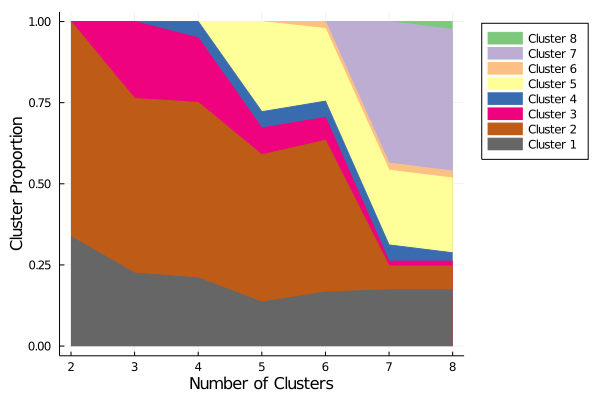

In [23]:
cum_plot(plotmat)

In [24]:
savefig("figures/bio_kmeans_portfolio_$upper")

#### Number of Clusters

* https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

using methods above, determined that 3 clusters

#### Verifying Clusters

In [25]:
y_1h = map(x-> if (x == "RB") 1 else 2 end , y[train])
collect(zip(assignments[2], y_1h))

738-element Array{Tuple{Int64,Int64},1}:
 (2, 2)
 (2, 1)
 (1, 2)
 (2, 1)
 (2, 2)
 (2, 1)
 (1, 2)
 (2, 1)
 (1, 1)
 (2, 2)
 (2, 2)
 (2, 1)
 (2, 2)
 (2, 2)
 (3, 2)
 (3, 2)
 (2, 2)
 (1, 2)
 (2, 2)
 (2, 1)
 (1, 1)
 (2, 1)
 (1, 1)
 (1, 1)
 (2, 1)
 (1, 1)
 (3, 2)
 (2, 1)
 (1, 2)
 (1, 2)
 (2, 2)
 (2, 1)
 (2, 2)
 (2, 1)
 (2, 2)
 (2, 2)
 (2, 1)
 (1, 2)
 (2, 2)
 (2, 2)
 (2, 2)
 (2, 2)
 (3, 2)
 (1, 1)
 (2, 2)
 (3, 2)
 (2, 2)
 (3, 2)
 ⋮
 (2, 1)
 (3, 1)
 (1, 1)
 (3, 2)
 (3, 2)
 (1, 2)
 (3, 2)
 (2, 2)
 (3, 2)
 (1, 2)
 (1, 2)
 (3, 2)
 (1, 2)
 (3, 2)
 (2, 1)
 (3, 2)
 (3, 2)
 (3, 2)
 (1, 2)
 (3, 2)
 (2, 1)
 (2, 1)
 (3, 2)
 (2, 2)
 (1, 2)
 (2, 2)
 (3, 2)
 (1, 1)
 (1, 2)
 (2, 1)
 (1, 1)
 (2, 2)
 (2, 2)
 (2, 1)
 (1, 1)
 (2, 1)
 (3, 2)
 (2, 2)
 (1, 1)
 (2, 2)
 (2, 1)
 (3, 2)
 (1, 1)
 (1, 2)
 (2, 1)
 (1, 1)
 (1, 1)

In [26]:
mutualinfo(assignments[2], y_1h)

0.11438395582140504

In [27]:
vmeasure(assignments[2], y_1h)

0.11438395582140479

In [28]:
randindex(assignments[2], y_1h)

(0.0370550044426732, 0.5079958669328891, 0.4920041330671109, 0.015991733865778276)

In [29]:
varinfo(assignments[2], y_1h)

1.4609782694343798

In [30]:
function pairplot(X, y; c=[1])
    classes = size(unique(y))[1]
    ycol = distinguishable_colors(classes)[y]
#     @df data corrplot(cols(c), group=y, markercolor=ycol)
    @df data cornerplot(cols(c), group=y, markercolor=ycol, compact=true)
end

# https://github.com/JuliaPlots/StatsPlots.jl/issues/217

pairplot (generic function with 1 method)

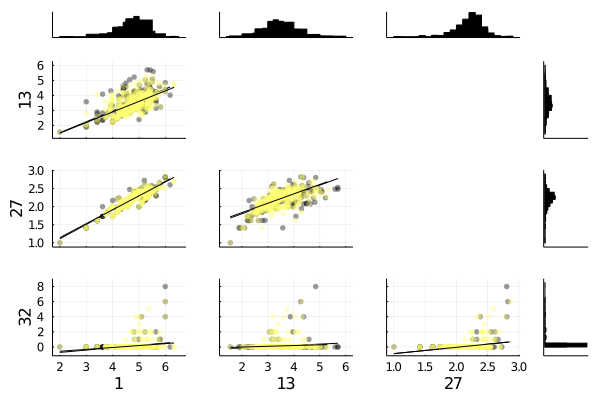

In [31]:
pairplot(X_stand[train,:], y_1h, c=[1,13,27,32,]) #1,13,27,32,33,35,39

In [17]:
savefig("figures/bio_pair_plot")

1 and 27, 27 and 13. central mass of majority class, in different axes there are differences for the minority class. this meshes with the metrics that use the labels

### Expectation Maximization

* https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture
* https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#sphx-glr-auto-examples-mixture-plot-gmm-pdf-py
* https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py
* https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html#sphx-glr-auto-examples-mixture-plot-gmm-selection-py
* https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture
* https://github.com/JuliaPy/PyCall.jl

In [32]:
sklearn_m = pyimport("sklearn.mixture")

PyObject <module 'sklearn.mixture' from '/home/andrew/miniconda3/envs/julia/lib/python3.7/site-packages/sklearn/mixture/__init__.py'>

In [33]:
upper = 8
k_range = 2:upper
bics = []
sils = []
ls = []
sil_means = []
assignments = []

for i in k_range
    println("Gaussians = $i")
    clf = sklearn_m.GaussianMixture(n_components=i, covariance_type="full", random_state=RNG)
    labels = clf.fit_predict(train_data) .+ 1; # indexing issues from python to julia functions
    
    d = countmap(labels)
    k = d |> keys
    v = d |> values
    l = sort(collect(zip(k,v)), by=x->x[1])
    @show l
    
    s = silhouettes(labels, dist_mat(train_data))
    println("silhouette: $(mean(s))")
    
    bayes_ic = clf.bic(train_data)
    @show bayes_ic
    
    push!(ls, l)
    push!(sils, s)
    push!(sil_means, mean(s))
    push!(bics, bayes_ic)
    push!(assignments, labels)
    println("")
end

Gaussians = 2
l = [(1, 38), (2, 700)]
silhouette: 0.38685536183333646
bayes_ic = 30737.84863304066

Gaussians = 3
l = [(1, 37), (2, 457), (3, 244)]
silhouette: 0.15622091860472928
bayes_ic = 9297.011329167355

Gaussians = 4
l = [(1, 37), (2, 454), (3, 237), (4, 10)]
silhouette: 0.17489165749760327
bayes_ic = 7423.094062810716

Gaussians = 5
l = [(1, 37), (2, 511), (3, 173), (4, 7), (5, 10)]
silhouette: 0.2306487012640807
bayes_ic = 4111.060290181347

Gaussians = 6
l = [(1, 37), (2, 180), (3, 112), (4, 7), (5, 9), (6, 393)]
silhouette: 0.08819695453883962
bayes_ic = -5239.590676239146

Gaussians = 7
l = [(1, 37), (2, 201), (3, 145), (4, 7), (5, 9), (6, 301), (7, 38)]
silhouette: 0.10319971764093588
bayes_ic = -13056.833765663047

Gaussians = 8
l = [(1, 37), (2, 141), (3, 48), (4, 60), (5, 17), (6, 10), (7, 90), (8, 335)]
silhouette: 0.11090178265679469
bayes_ic = -17729.73171806419



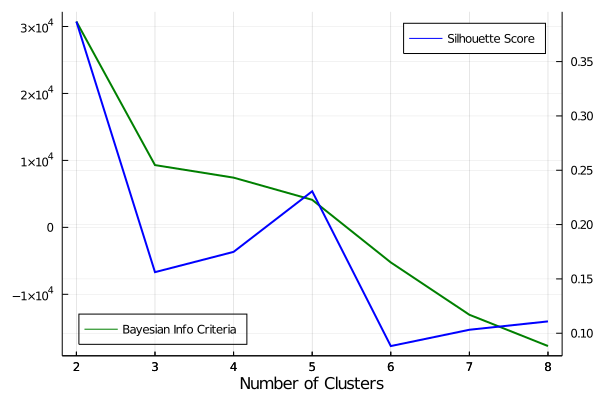

In [34]:
plot(k_range, bics, legend=:bottomleft, label="Bayesian Info Criteria", color=:green, lw=2)
xlabel!("Number of Clusters")
plot!(twinx(),k_range, sil_means, legend=:topright, label="Silhouette Score", color=:blue, lw=2)

In [35]:
savefig("figures/bio_em_metrics_$upper")

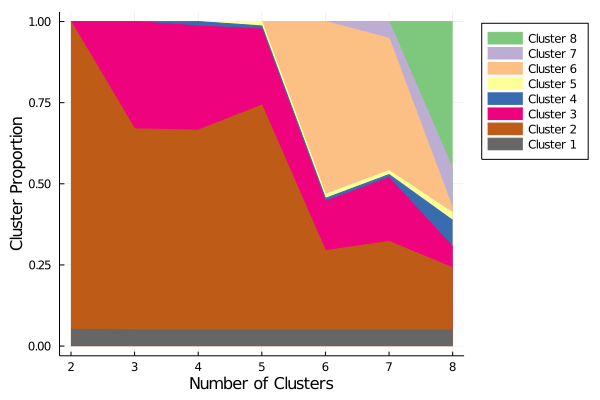

In [36]:
mat = prepare_portfolio(ls)
plotmat = cum_columns(mat, normalize=true)
cum_plot(plotmat)

In [37]:
savefig("figures/bio_em_portfolio_$upper")

#### Number of Clusters

* https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

using methods above, determined that 3 clusters

#### Verifying Clusters

In [38]:
y_1h = map(x-> if (x == "RB") 1 else 3 end , y[train])
collect(zip(assignments[2], y_1h))

738-element Array{Tuple{Int64,Int64},1}:
 (3, 3)
 (2, 1)
 (1, 3)
 (2, 1)
 (2, 3)
 (2, 1)
 (2, 3)
 (2, 1)
 (3, 1)
 (2, 3)
 (2, 3)
 (2, 1)
 (2, 3)
 (2, 3)
 (2, 3)
 (3, 3)
 (2, 3)
 (2, 3)
 (3, 3)
 (2, 1)
 (2, 1)
 (2, 1)
 (3, 1)
 (3, 1)
 (3, 1)
 (2, 1)
 (1, 3)
 (2, 1)
 (2, 3)
 (3, 3)
 (2, 3)
 (2, 1)
 (3, 3)
 (3, 1)
 (3, 3)
 (2, 3)
 (2, 1)
 (2, 3)
 (2, 3)
 (2, 3)
 (3, 3)
 (3, 3)
 (3, 3)
 (2, 1)
 (3, 3)
 (3, 3)
 (3, 3)
 (3, 3)
 ⋮
 (2, 1)
 (3, 1)
 (2, 1)
 (3, 3)
 (3, 3)
 (2, 3)
 (3, 3)
 (2, 3)
 (3, 3)
 (3, 3)
 (2, 3)
 (3, 3)
 (2, 3)
 (3, 3)
 (2, 1)
 (1, 3)
 (3, 3)
 (1, 3)
 (3, 3)
 (3, 3)
 (3, 1)
 (2, 1)
 (3, 3)
 (2, 3)
 (1, 3)
 (2, 3)
 (2, 3)
 (2, 1)
 (1, 3)
 (2, 1)
 (2, 1)
 (2, 3)
 (2, 3)
 (2, 1)
 (3, 1)
 (2, 1)
 (2, 3)
 (2, 3)
 (3, 1)
 (2, 3)
 (2, 1)
 (2, 3)
 (2, 1)
 (2, 3)
 (2, 1)
 (2, 1)
 (1, 1)

In [39]:
mutualinfo(assignments[2], y_1h)

0.08216443573645812

In [40]:
vmeasure(assignments[2], y_1h)

0.08216443573645782

In [41]:
randindex(assignments[2], y_1h)

(0.011210036854955321, 0.5050468279445345, 0.49495317205546546, 0.010093655889069067)

In [42]:
varinfo(assignments[2], y_1h)

1.332747903285773

# Dimensionality Reduction
Apply the dimensionality reduction algorithms to the two datasets and describe what you see.


### PCA

In [43]:
info("PCA")

Principal component analysis. Learns a linear transformation to
project the data  on a lower dimensional space while preserving most of the initial
variance.

→ based on [MultivariateStats](https://github.com/JuliaStats/MultivariateStats.jl).
→ do `@load PCA pkg="MultivariateStats"` to use the model.
→ do `?PCA` for documentation.
(name = "PCA",
 package_name = "MultivariateStats",
 is_supervised = false,
 docstring = "Principal component analysis. Learns a linear transformation to\nproject the data  on a lower dimensional space while preserving most of the initial\nvariance.\n\n→ based on [MultivariateStats](https://github.com/JuliaStats/MultivariateStats.jl).\n→ do `@load PCA pkg=\"MultivariateStats\"` to use the model.\n→ do `?PCA` for documentation.",
 hyperparameter_ranges = (nothing, nothing, nothing, nothing),
 hyperparameter_types = ("Int64", "Symbol", "Float64", "Union{Nothing, Array{Float64,1}, Real}"),
 hyperparameters = (:maxoutdim, :method, :pratio, :mean),
 implemented_me

In [44]:
model = @load PCA pkg="MultivariateStats" 
mach = machine(model, X_stand)
MLJ.fit!(mach, rows=train)

┌ Warning: New model type being bound to `PCA2` to avoid conflict with an existing name. 
└ @ MLJModels /home/andrew/.julia/packages/MLJModels/JR7LJ/src/loading.jl:78
┌ Info: Training Machine{PCA} @537.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319


Machine{PCA} @537 trained 1 time.
  args: 
    1:	Source @159 ⏎ `Table{AbstractArray{Continuous,1}}`


In [45]:
report(mach)

(indim = 41,
 outdim = 31,
 tprincipalvar = 40.640745912578105,
 tresidualvar = 0.35925408742186704,
 tvar = 40.99999999999997,
 mean = [1.5013585075554284e-15, 2.496497438164563e-16, 4.441644282121646e-17, -3.26748564970981e-16, 1.0951793522047615e-16, 1.1087186573831171e-16, -1.4065833713069396e-16, 9.026203452237045e-18, -3.8963111568823247e-17, -1.3178257040266086e-16  …  1.8714328490971474e-16, 3.809057856844033e-16, 7.612098244719907e-17, 1.2937558281539763e-16, 1.7631184076703028e-16, 3.938433439659431e-16, 3.249433242805336e-17, 6.920089313381734e-17, -6.882480132330746e-17, -3.2535702527209446e-16],
 principalvars = [7.365169278970669, 5.276197258688738, 4.447795939959116, 3.46182804472242, 2.5752129469438554, 2.3507246508157364, 1.53008356261788, 1.3810299002614992, 1.3488981672125044, 1.2477764791908332  …  0.2834910784547285, 0.27220311313547957, 0.24357542929851844, 0.20118635510936028, 0.16105446559250355, 0.14939622617800993, 0.13851026959106083, 0.12705380716001205, 0.1

In [46]:
report(mach)[:principalvars]

31-element Array{Float64,1}:
 7.365169278970669
 5.276197258688738
 4.447795939959116
 3.46182804472242
 2.5752129469438554
 2.3507246508157364
 1.53008356261788
 1.3810299002614992
 1.3488981672125044
 1.2477764791908332
 1.1390790603797376
 0.9682358320449782
 0.9562858973658651
 0.8964541591885512
 0.7711392706182953
 0.683389074356612
 0.6559329318408003
 0.5575077652131084
 0.48066097324616114
 0.4061393261928559
 0.3619427953477185
 0.2834910784547285
 0.27220311313547957
 0.24357542929851844
 0.20118635510936028
 0.16105446559250355
 0.14939622617800993
 0.13851026959106083
 0.12705380716001205
 0.10604869992619334
 0.0967431529543019

In [47]:
fitted_params(mach)[1]

41×31 Array{Float64,2}:
 -0.268614    -0.105434      0.106583    …  -0.0529787   -0.3295
  0.00731336  -0.273362      0.146162        0.323619     0.0168663
 -0.171281     0.0881482     0.212152       -0.0669725    0.0972041
 -0.0892719   -0.00972932   -0.207002       -0.00925766   0.0276623
 -0.20291      0.00997635   -0.313449        0.235663     0.0136088
 -0.0950707   -0.246135      0.141048    …  -0.254201    -0.410481
 -0.271972     0.107273     -0.0529177       0.00644952   0.218579
 -0.180673     0.22291       0.0527646      -0.0829224    0.261041
 -0.0260051   -0.117448      0.00285581      0.0522201    0.221153
 -0.11213     -0.248188     -0.0572392      -0.0292987    0.0419845
 -0.20286      0.00716187   -0.33353     …   0.145538    -0.101558
  0.0796845    0.197379      0.0179564       0.0519477    0.0346639
 -0.31198     -0.0225799     0.11883         0.144164     0.248654
  0.0615548   -0.172326      0.00851041     -0.572836     0.0751431
 -0.300594    -0.0975345     0.04

In [48]:
model

PCA(
    maxoutdim = 0,
    method = :auto,
    pratio = 0.99,
    mean = nothing) @002

In [49]:
# plot explained variance
max_dims=31
ex_vars = []

for i in 1:max_dims
    model.maxoutdim = i
    mach = machine(model, X_stand)
    MLJ.fit!(mach, rows=train) 
    
    r = mach.report
    push!(ex_vars, r[:tprincipalvar] / r[:tvar])   
    
end


┌ Info: Training Machine{PCA} @622.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319
┌ Info: Training Machine{PCA} @011.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319
┌ Info: Training Machine{PCA} @657.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319
┌ Info: Training Machine{PCA} @106.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319
┌ Info: Training Machine{PCA} @761.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319
┌ Info: Training Machine{PCA} @268.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319
┌ Info: Training Machine{PCA} @226.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319
┌ Info: Training Machine{PCA} @455.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319
┌ Info: Training Machine{PCA} @788.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319
┌

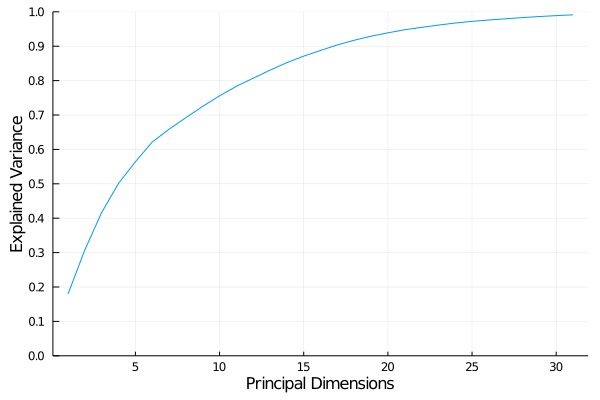

In [50]:
#elbow method
plot(1:max_dims, ex_vars, ylims=(0,1), legend=false)
yticks!(0:0.1:1)
xlabel!("Principal Dimensions")
ylabel!("Explained Variance")

In [17]:
savefig("figures/bio_pca_explained_variance")

weak elbow, that has low explained variance. probably going to opt for around 20 after which it doesn't improve quickly

visualize top 2 or 3 principal components

In [57]:
sum(mach.report[:principalvars][1:3]) / sum(mach.report[:principalvars])

0.4204933274201917

In [62]:
model.maxoutdim = 3
mach = machine(model, X_stand)
MLJ.fit!(mach, rows=train) 
data_trans = MLJ.transform(mach, rows=train, )

┌ Info: Training Machine{PCA} @901.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319


,x1,x2,x3
,Float64,Float64,Float64
1,0.223433,2.57844,0.638956
2,1.05446,0.144434,0.333319
3,-3.0974,0.896155,4.31934
4,0.145159,-0.104215,0.384331
5,3.16223,2.01436,-0.395514
6,1.82107,1.30731,0.235263
7,1.64274,-2.05091,0.509223
8,0.60222,2.95115,0.600282
9,-0.93168,-1.70586,0.497661


In [85]:
plotattr(:Series)
plotattr("markercolor")
plotattr("seriescolor")
plotattr("camera")

Defined Series attributes are:
arrow, bar_edges, bar_position, bar_width, bins, colorbar_entry, connections, contour_labels, contours, extra_kwargs, fill_z, fillalpha, fillcolor, fillrange, group, hover, label, levels, line_z, linealpha, linecolor, linestyle, linewidth, marker_z, markeralpha, markercolor, markershape, markersize, markerstrokealpha, markerstrokecolor, markerstrokestyle, markerstrokewidth, normalize, orientation, primary, quiver, ribbon, series_annotations, seriesalpha, seriescolor, seriestype, show_empty_bins, smooth, stride, subplot, weights, x, xerror, y, yerror, z, zerror
markercolor {Color Type}
markercolors, markercolour, mc, mcolor, mcolour

Color of the interior of the marker or shape. `:match` will take the value from `:seriescolor`.
Series attribute,  default: match
seriescolor {Color Type}
c, color, colour, seriescolors

The base color for this series.  `:auto` (the default) will select a color from the subplot's `color_palette`, based on the order it was adde

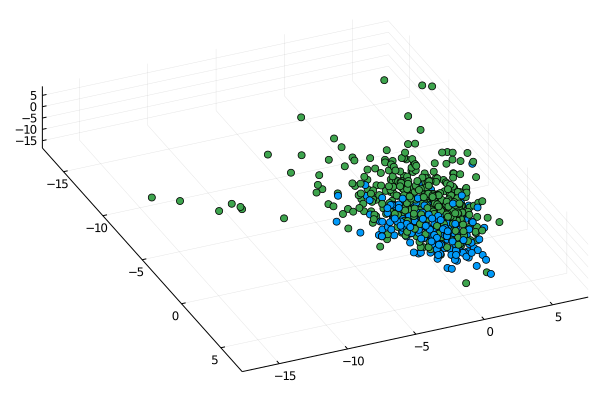

In [114]:
scatter(data_trans[:,1],data_trans[:,2],data_trans[:,3], leg=false, c=y_1h, camera=(60,80))

In [115]:
savefig("figures/bio_pca_$(model.maxoutdim)_comps_3D")

### ICA

In [ ]:
kurtosis

visualize top 2 or 3 components

### Randomized Projections

### Classical Multidimensional Scaling
* https://multivariatestatsjl.readthedocs.io/en/stable/cmds.html

# Clustering Pt 2
Reproduce your clustering experiments, but on the data after you've run dimensionality reduction on it. Yes, that’s 16 combinations of datasets, dimensionality reduction, and clustering method. You should look at all of them, but focus on the more interesting findings in your report.

### Kmeans - PCA

### EM - PCA

### Kmeans - ICA

### EM - ICA

### Kmeans - Randomized Projections

### EM - Randomized Projections

### Kmeans - Classical Multidimensional Scaling

### EM - Classical Multidimensional Scaling

# BELOW ONLY FOR 1 DATASET

### Dimensionality Reduction + NN 
Apply the dimensionality reduction algorithms to one of your datasets from assignment #1. (if you've reused the datasets from assignment #1 to do experiments 1-3 above then you've already done this) and rerun your neural network learner on the newly projected data.

### Clustering + NN
Apply the clustering algorithms to the same dataset to which you just applied the dimensionality reduction algorithms (you've probably already done this), treating the clusters as if they were new features. In other words, treat the clustering algorithms as if they were dimensionality reduction algorithms. Again, rerun your neural network learner on the newly projected data.

In [ ]:
# do one hot encoding or proabilisitc encoding. Features will be the one hot encodings